## Programming Exercise 3: Multi-class Classification and Neural Networks

#### Setup

In [2]:
import numpy as np
from scipy.io import loadmat
from scipy.optimize import minimize
import matplotlib.pyplot as plt

data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']

weights = loadmat('ex3weights.mat')
theta1 = weights['Theta1']
theta2 = weights['Theta2']
m = X.shape[0]
X_pad = np.c_[np.ones((m, 1)), X]

#### Displaying Data

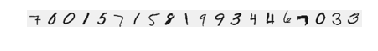

In [3]:
rand_indices = np.random.choice(m, 20)
sel1 = X_pad[rand_indices[0:20], 1:].reshape(-1,20).T

plt.imshow(sel1, cmap='gray_r')
plt.axis('off');
plt.show()
# Showing one line from the data

### Logistic Regression Cost Function
For the test values we have:
* **Expected cost**: 2.534819
* **Expected gradients**: [0.146561 -0.548558 0.724722 1.398003]

In [5]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))

def lr_cost_function(theta, x, y, lam):
    _m = y.size
    temp = np.copy(theta)
    temp[0] = 0
    h = sigmoid(x.dot(theta))   
    J_regf = float(lam) / (2. * _m) * np.sum(np.square(temp))
    J = -1. / _m * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y)) + J_regf
    
    return J

def lr_gradient(theta, x, y, lam):
    _m = y.size
    y = y.reshape(-1,1)
    temp = np.copy(theta)
    temp[0] = 0
    h = sigmoid(x.dot(theta.reshape(-1,1)))
    g_regf = (float(lam) / _m * temp).reshape(-1,1)
    grad = (1. / _m) * x.T.dot(h - y) + g_regf
    
    return (grad.flatten())

# Testing the Logistic Regression Cost Function
theta_t = np.array([-2, -1, 1, 2])
X_t = np.concatenate((np.ones((1,5)), (np.arange(1., 16.)/10).reshape(-1,5))).T
y_t = np.array([1, 0, 1, 0, 1])
lambda_t = 3


J, grad = (lr_cost_function(theta_t, X_t, y_t, lambda_t), lr_gradient(theta_t, X_t, y_t, lambda_t))
print J, grad

2.53481939611 [ 0.14656137 -0.54855841  0.72472227  1.39800296]


### Predict for One-Vs-All

In [28]:
def one_vs_all(x, y, num_labels, lam):
    all_theta = np.zeros((num_labels, x.shape[1]))
    initial_theta = np.zeros((x.shape[1],1))
    
    for i in np.arange(1, num_labels+1):
        tht = minimize(lr_cost_function, initial_theta, \
                       args = (x, (y == i)*1, lam), \
                       method=None, jac=lr_gradient, \
                      options={'maxiter':50})
        all_theta[i-1] = tht.x
        
    return all_theta

def predict_one_vs_all(all_theta, x):
    probabilities = sigmoid(x.dot(all_theta.T))
    return np.argmax(probabilities, axis=1)+1



new_theta = one_vs_all(X_pad, y, 10, 0.1)
pred = predict_one_vs_all(new_theta, X_pad)
accuracy = np.mean(pred == y.flatten())*100

In [30]:
print 'One-vs-All Training Accuracy: %f' % accuracy

One-vs-All Training Accuracy: 93.240000


The prediction of 93.24 is slightly below the expected value, but it is close.

### Neural Networks
Implementing a simple feedforward neural network

In [55]:
def predict_neural_network(theta_1, theta_2, x):
    a2 = sigmoid(x.dot(theta_1.T))
    a2 = np.c_[np.ones((a2.shape[0], 1)), a2]
    return np.argmax(sigmoid(a2.dot(theta_2.T)), axis=1)+1

The implementation is simple - just feeding the sole hidden layer, than adjusting the output layer after that.

In [59]:
nn_predictions = predict_neural_network(theta1, theta2, X_pad)

Now for the accuracy of the predictions

In [60]:
nn_accuracy = np.mean(nn_predictions == y.flatten())*100
print "Neural Network accuracy: %f" % (nn_accuracy)

Neural Network accuracy: 97.520000
